In [1]:
## Qian MW runs ASC analysis

In [1]:
import cosima_cookbook as cc
from dask.distributed import Client
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np

import xarray as xr
import cmocean as cm
import cartopy.crs as ccrs
import cmocean as cm
import glob
import os

In [2]:
import matplotlib.dates as mdates
import datetime
import pandas as pd

In [3]:
%matplotlib inline

In [4]:
from matplotlib import rc
rc('font', **{'size':25})
rc('text', usetex=False)
rc('xtick', labelsize=30) #20 
rc('ytick', labelsize=30) #20
rc('axes', titlesize=30)    # fontsize of the axes title
rc('axes', labelsize=30) #24    # fontsize of the x and y labels

In [5]:
session=cc.database.create_session()
#expt = '01deg_jra55v13_ryf9091'

In [6]:
from dask.distributed import Client
import dask

c=Client(local_directory = '/g/data/v45/qo9901/') 
c 

<Client: 'tcp://127.0.0.1:37091' processes=7 threads=28, memory=125.18 GiB>

In [7]:
from cosima_cookbook import explore
ee = explore.ExperimentExplorer(session=session)

In [8]:
ee

ExperimentExplorer(children=(HTML(value='\n            <h3>Experiment Explorer</h3>\n\n            <p>Select a…

In [9]:
exp_ctrl= '01deg_jra55v13_ryf9091_qian_ctrl'
exp_wthmp= '01deg_jra55v13_ryf9091_qian_wthmp'
exp_wtlp= '01deg_jra55v13_ryf9091_qian_wtlp'
exp_wthp= '01deg_jra55v13_ryf9091_qian_wthp'
lat_lim = slice(-79, -60)


In [10]:
ht = cc.querying.getvar(exp_wthmp, 'ht', session, n=1).drop(['geolat_t', 'geolon_t']).sel(yt_ocean=lat_lim).load() #.drop(['geolat_c', 'geolon_c'])

In [8]:
temp_wthmp = cc.querying.getvar(expt=exp_wthmp, variable='temp', 
                          session=session, frequency='1 monthly',
                          attrs={'cell_methods': 'time: mean'},
                          start_time='2110-01-31 00:00:00', 
                          end_time='2159-12-31 00:00:00').sel(yt_ocean = lat_lim)
temp_wthp = cc.querying.getvar(expt=exp_wthp, variable='temp', 
                          session=session, frequency='1 monthly',
                          attrs={'cell_methods': 'time: mean'},
                          start_time='2110-01-31 00:00:00', 
                          end_time='2159-12-31 00:00:00').sel(yt_ocean = lat_lim)


/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/xarray/core/dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/xarray/core/dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/xarray/core/dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3

In [9]:
temp_wthmp

<xarray.DataArray 'temp' (time: 600, st_ocean: 75, yt_ocean: 440, xt_ocean: 3600)> Size: 285GB
dask.array<getitem, shape=(600, 75, 440, 3600), dtype=float32, chunksize=(1, 7, 250, 400), chunktype=numpy.ndarray>
Coordinates:
  * xt_ocean  (xt_ocean) float64 29kB -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean  (yt_ocean) float64 4kB -79.0 -78.95 -78.91 ... -60.15 -60.1 -60.05
  * st_ocean  (st_ocean) float64 600B 0.5413 1.681 2.94 ... 5.511e+03 5.709e+03
  * time      (time) object 5kB 2110-01-16 12:00:00 ... 2159-12-16 12:00:00
Attributes:
    long_name:      Conservative temperature
    units:          K
    valid_range:    [-10. 500.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_water_conservative_temperature
    ncfiles:        ['/g/data/cj50/access-om2/raw-output/access-om2-01/01deg_...

In [34]:
for n in [4]:
    #temp_mw_wtlp_anom = (temp_wthmp.isel(st_ocean = 0).isel(time = slice(120*n, 120*(n+1))) - temp_wtlp.isel(st_ocean = 0).isel(time = slice(120*n, 120*(n+1)))).mean(dim = 'time')
    temp_mw_anom = (temp_wthmp.isel(st_ocean = 0).isel(time = slice(120*n, 120*(n+1))) - temp_wthp.isel(st_ocean = 0).isel(time = slice(120*n, 120*(n+1)))).mean(dim = 'time')

In [35]:
temp_mw_anom

<xarray.DataArray 'temp' (yt_ocean: 440, xt_ocean: 3600)> Size: 6MB
dask.array<mean_agg-aggregate, shape=(440, 3600), dtype=float32, chunksize=(250, 400), chunktype=numpy.ndarray>
Coordinates:
  * xt_ocean  (xt_ocean) float64 29kB -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean  (yt_ocean) float64 4kB -79.0 -78.95 -78.91 ... -60.15 -60.1 -60.05
    st_ocean  float64 8B 0.5413

In [ ]:
## plotting

In [14]:
theta  = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.45
verts  = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

land = xr.where(np.isnan(ht.rename('land')), 1, np.nan)

In [15]:
import cmocean 

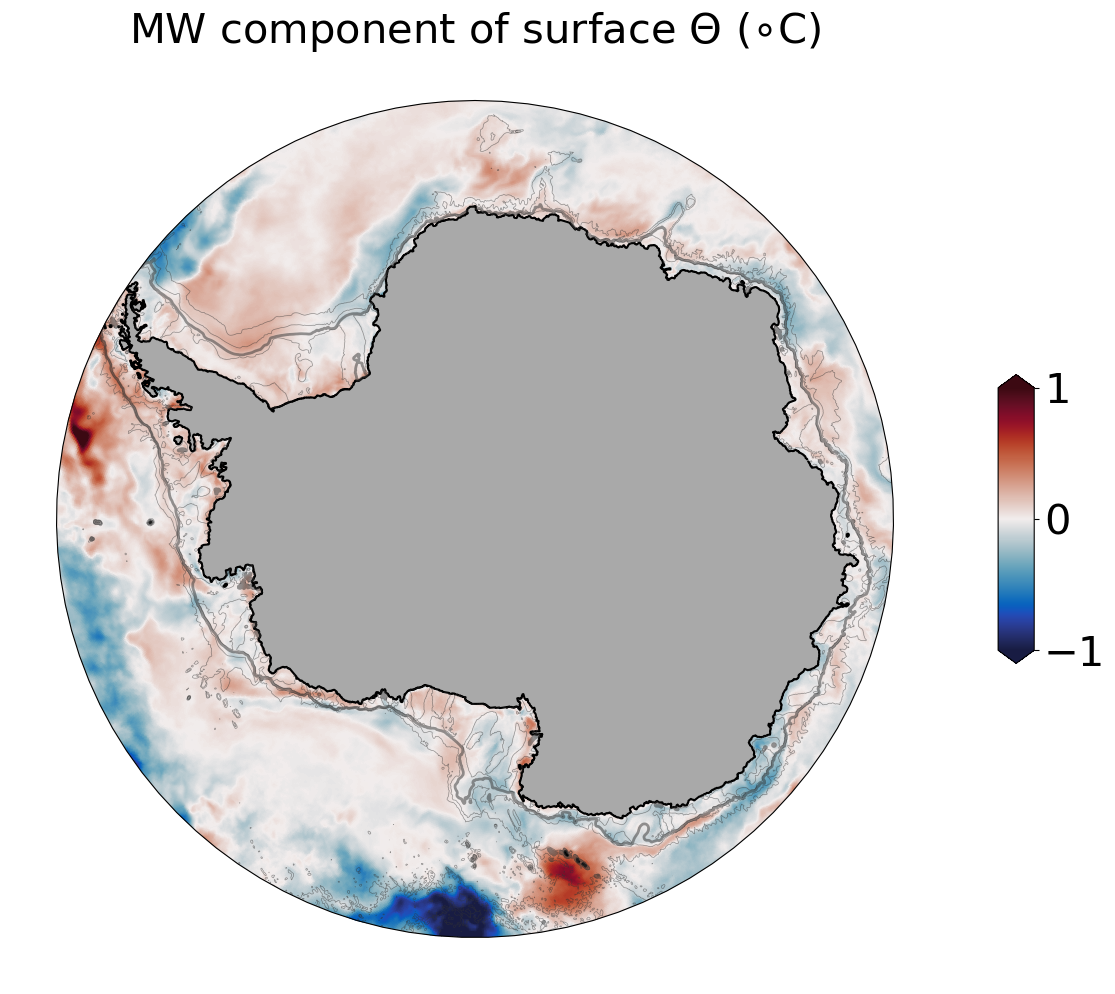

In [39]:
fig = plt.figure(1, figsize=(15, 15))

ax = plt.subplot(1, 1, 1, projection=ccrs.SouthPolarStereo(), facecolor="darkgrey")
ax.set_boundary(circle, transform=ax.transAxes)
    
# Filled land 
land.plot.contourf(ax=ax, colors='darkgrey', zorder=2,
                   transform=ccrs.PlateCarree(), add_colorbar=False)

# Coastline
land.fillna(0).plot.contour(ax=ax, colors='k', levels=[0, 1],
                            transform=ccrs.PlateCarree(), add_colorbar=False)

# Depth contours
ht.plot.contour(ax=ax, levels=[500, 1000, 2000, 3000],
                colors='0.2', linewidths=[0.5, 2, 0.5, 0.5], alpha=0.5,
                transform=ccrs.PlateCarree())

# surface temp for mw component
sc = temp_mw_anom.plot(ax = ax,cmap=cmocean.cm.balance, vmax = 1, vmin = -1, transform=ccrs.PlateCarree(),\
                       cbar_kwargs={'orientation': 'vertical',\
                                    'shrink': 0.25,\
                                    'extend': 'both',\
                                    'label': None, \
                                    'aspect': 8}) #cmap=cmocean.cm.balance,

ax.set_title('MW component of surface $\Theta$ ($\circ$C)');

## surface speed

In [11]:
u_wthmp = cc.querying.getvar(expt=exp_wthmp, variable='u', 
                          session=session, frequency='1 monthly',
                          attrs={'cell_methods': 'time: mean'},
                          start_time='2110-01-31 00:00:00', 
                          end_time='2159-12-31 00:00:00').sel(yu_ocean = lat_lim).isel(st_ocean = 0)
v_wthmp = cc.querying.getvar(expt=exp_wthmp, variable='v', 
                          session=session, frequency='1 monthly',
                          attrs={'cell_methods': 'time: mean'},
                          start_time='2110-01-31 00:00:00', 
                          end_time='2159-12-31 00:00:00').sel(yu_ocean = lat_lim).isel(st_ocean = 0)
u_wthp = cc.querying.getvar(expt=exp_wthp, variable='u', 
                          session=session, frequency='1 monthly',
                          attrs={'cell_methods': 'time: mean'},
                          start_time='2110-01-31 00:00:00', 
                          end_time='2159-12-31 00:00:00').sel(yu_ocean = lat_lim).isel(st_ocean = 0)
v_wthp = cc.querying.getvar(expt=exp_wthp, variable='v', 
                          session=session, frequency='1 monthly',
                          attrs={'cell_methods': 'time: mean'},
                          start_time='2110-01-31 00:00:00', 
                          end_time='2159-12-31 00:00:00').sel(yu_ocean = lat_lim).isel(st_ocean = 0)
u_wthp

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/xarray/core/dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/xarray/core/dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/xarray/core/dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3

<xarray.DataArray 'u' (time: 600, yu_ocean: 440, xu_ocean: 3600)> Size: 4GB
dask.array<getitem, shape=(600, 440, 3600), dtype=float32, chunksize=(1, 250, 400), chunktype=numpy.ndarray>
Coordinates:
    st_ocean  float64 8B 0.5413
  * time      (time) object 5kB 2110-01-16 12:00:00 ... 2159-12-16 12:00:00
  * xu_ocean  (xu_ocean) float64 29kB -279.9 -279.8 -279.7 ... 79.8 79.9 80.0
  * yu_ocean  (yu_ocean) float64 4kB -78.98 -78.93 -78.89 ... -60.07 -60.02
Attributes:
    long_name:      i-current
    units:          m/sec
    valid_range:    [-10.  10.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_water_x_velocity
    ncfiles:        ['/g/data/cj50/access-om2/raw-output/access-om2-01/01deg_...

In [12]:
## getting characteristic speed
speed_wthmp_t = []
for n in range(5):
    speed_wthmp = np.sqrt(u_wthmp.isel(time = slice(120*n, 120*(n+1)))**2 + v_wthmp.isel(time = slice(120*n, 120*(n+1)))**2)
    speed_wthmp_t.append(speed_wthmp.mean(dim = 'time').load())
speed_wthmp_t

[<xarray.DataArray (yu_ocean: 440, xu_ocean: 3600)> Size: 6MB
 array([[       nan,        nan,        nan, ...,        nan,        nan,
                nan],
        [       nan,        nan,        nan, ...,        nan,        nan,
                nan],
        [       nan,        nan,        nan, ...,        nan,        nan,
                nan],
        ...,
        [0.07853378, 0.06941916, 0.06329309, ..., 0.12413593, 0.10790288,
         0.09183453],
        [0.08067233, 0.07069628, 0.0638342 , ..., 0.12365504, 0.10874149,
         0.09363772],
        [0.08394571, 0.07323435, 0.06530849, ..., 0.12341467, 0.1102052 ,
         0.09665179]], dtype=float32)
 Coordinates:
     st_ocean  float64 8B 0.5413
   * xu_ocean  (xu_ocean) float64 29kB -279.9 -279.8 -279.7 ... 79.8 79.9 80.0
   * yu_ocean  (yu_ocean) float64 4kB -78.98 -78.93 -78.89 ... -60.07 -60.02,
 <xarray.DataArray (yu_ocean: 440, xu_ocean: 3600)> Size: 6MB
 array([[       nan,        nan,        nan, ...,        nan,      

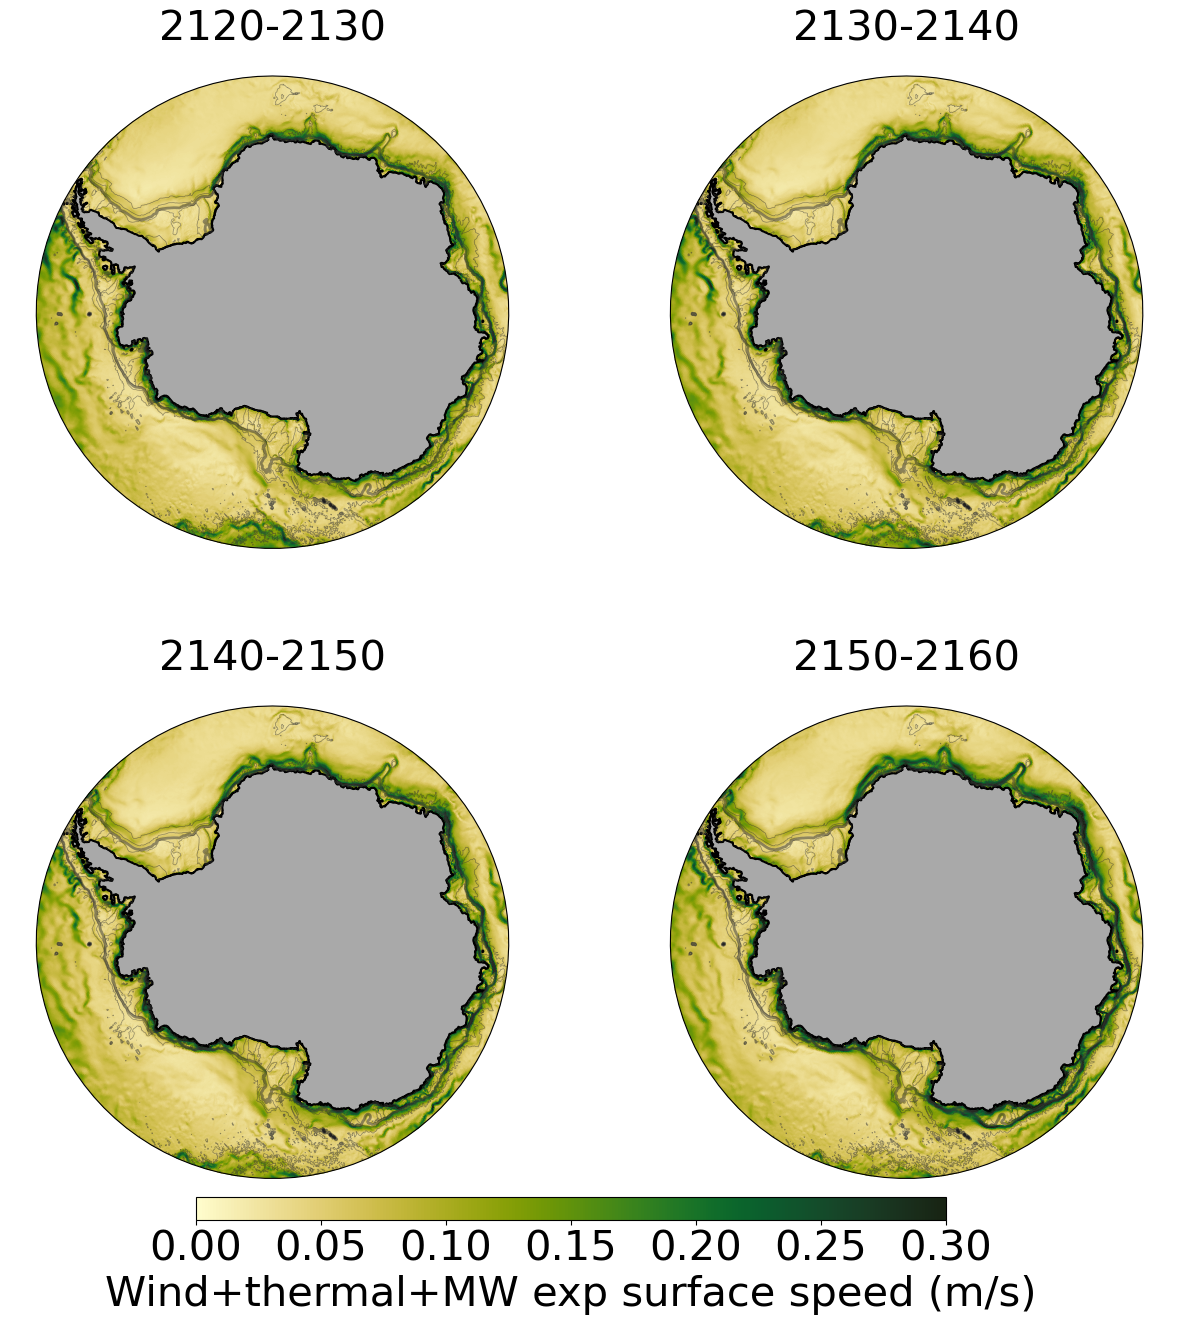

In [18]:
fig = plt.figure(1, figsize=(15, 15))

ax0 = plt.subplot(2, 2, 1, projection=ccrs.SouthPolarStereo(), facecolor="darkgrey")
ax0.set_boundary(circle, transform=ax0.transAxes)
    
# Filled land 
land.plot.contourf(ax=ax0, colors='darkgrey', zorder=2,
                   transform=ccrs.PlateCarree(), add_colorbar=False)

# Coastline
land.fillna(0).plot.contour(ax=ax0, colors='k', levels=[0, 1],
                            transform=ccrs.PlateCarree(), add_colorbar=False)

# Depth contours
ht.plot.contour(ax=ax0, levels=[500, 1000, 2000, 3000],
                colors='0.2', linewidths=[0.5, 2, 0.5, 0.5], alpha=0.5,
                transform=ccrs.PlateCarree())

# surface temp 
sc = speed_wthmp_t[1].plot(ax = ax0,vmax = 0.3, vmin = 0 ,  cmap=cmocean.cm.speed,transform=ccrs.PlateCarree(), add_colorbar = False) #cmap=cmocean.cm.balance,

ax0.set_title('2120-2130')

##########
ax1 = plt.subplot(2, 2, 2, projection=ccrs.SouthPolarStereo(), facecolor="darkgrey")
ax1.set_boundary(circle, transform=ax1.transAxes)
    
# Filled land 
land.plot.contourf(ax=ax1, colors='darkgrey', zorder=2,
                   transform=ccrs.PlateCarree(), add_colorbar=False)

# Coastline
land.fillna(0).plot.contour(ax=ax1, colors='k', levels=[0, 1],
                            transform=ccrs.PlateCarree(), add_colorbar=False)

# Depth contours
ht.plot.contour(ax=ax1, levels=[500, 1000, 2000, 3000],
                colors='0.2', linewidths=[0.5, 2, 0.5, 0.5], alpha=0.5,
                transform=ccrs.PlateCarree())

# surface temp
sc = speed_wthmp_t[2].plot(ax = ax1,vmax = 0.3, vmin = 0 ,  cmap=cmocean.cm.speed,transform=ccrs.PlateCarree(), add_colorbar = False) #cmap=cmocean.cm.balance,

ax1.set_title('2130-2140')
#######
ax2 = plt.subplot(2, 2, 3, projection=ccrs.SouthPolarStereo(), facecolor="darkgrey")
ax2.set_boundary(circle, transform=ax2.transAxes)
    
# Filled land 
land.plot.contourf(ax=ax2, colors='darkgrey', zorder=2,
                   transform=ccrs.PlateCarree(), add_colorbar=False)

# Coastline
land.fillna(0).plot.contour(ax=ax2, colors='k', levels=[0, 1],
                            transform=ccrs.PlateCarree(), add_colorbar=False)

# Depth contours
ht.plot.contour(ax=ax2, levels=[500, 1000, 2000, 3000], colors='0.2', linewidths=[0.5, 2, 0.5, 0.5], alpha=0.5,\
                transform=ccrs.PlateCarree())

# surface temp
sc = speed_wthmp_t[3].plot(ax = ax2,vmax = 0.3, vmin = 0 ,  cmap=cmocean.cm.speed,transform=ccrs.PlateCarree(), add_colorbar = False)
ax2.set_title('2140-2150')

#######
ax3 = plt.subplot(2, 2, 4, projection=ccrs.SouthPolarStereo(), facecolor="darkgrey")
ax3.set_boundary(circle, transform=ax3.transAxes)
    
# Filled land 
land.plot.contourf(ax=ax3, colors='darkgrey', zorder=2,
                   transform=ccrs.PlateCarree(), add_colorbar=False)

# Coastline
land.fillna(0).plot.contour(ax=ax3, colors='k', levels=[0, 1],
                            transform=ccrs.PlateCarree(), add_colorbar=False)

# Depth contours
ht.plot.contour(ax=ax3, levels=[500, 1000, 2000, 3000], colors='0.2', linewidths=[0.5, 2, 0.5, 0.5], alpha=0.5,\
                transform=ccrs.PlateCarree())

# surface temp
sc = speed_wthmp_t[4].plot(ax = ax3,vmax = 0.3, vmin = 0 ,  cmap=cmocean.cm.speed,transform=ccrs.PlateCarree(), add_colorbar = False)
ax3.set_title('2150-2160')

cax = fig.add_axes([0.25,0.1,0.5,0.015])
cb = plt.colorbar(sc,cax = cax,  orientation = 'horizontal', label ='Wind+thermal+MW exp surface speed (m/s)')
#plt.tight_layout()

In [23]:
## Line plot to get better idea
cluster_mask_access = xr.open_mfdataset('Antarctic-Eddy-Res-Compare/largest_3cluster_mask_xr_accessom201.nc')

speed_coast_t = []
for n in range(5):
    speed_wthmp = np.sqrt(u_wthmp.isel(time = slice(120*n, 120*(n+1)))**2 + v_wthmp.isel(time = slice(120*n, 120*(n+1)))**2)*cluster_mask_access
    speed_coast_t.append(speed_wthmp.mean(dim = {'xu_ocean','yu_ocean'}).load())

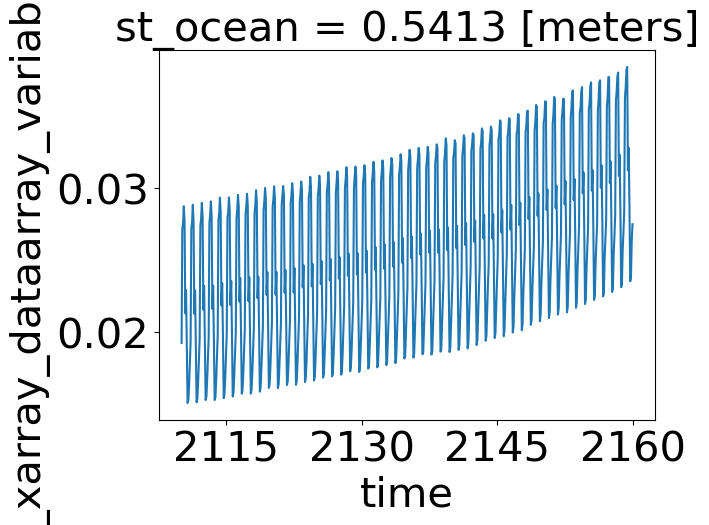

In [29]:
xr.merge(speed_coast_t).__xarray_dataarray_variable__.plot()

In [ ]:
speed_mw_comp_t = []
for n in range(5):
    speed_wthp = np.sqrt(u_wthp.isel(time = slice(120*n, 120*(n+1)))**2 + v_wthp.isel(time = slice(120*n, 120*(n+1)))**2)
    speed_wthmp = np.sqrt(u_wthmp.isel(time = slice(120*n, 120*(n+1)))**2 + v_wthmp.isel(time = slice(120*n, 120*(n+1)))**2)
    speed_mw_comp = (speed_wthmp- speed_wthp).mean(dim = 'time').load()
    speed_mw_comp_t.append(speed_mw_comp)
speed_mw_comp

In [107]:
import gc
c.run(gc.collect)

{'tcp://127.0.0.1:38375': 4875,
 'tcp://127.0.0.1:38391': 5832,
 'tcp://127.0.0.1:41627': 6374,
 'tcp://127.0.0.1:44039': 2811,
 'tcp://127.0.0.1:44271': 4133,
 'tcp://127.0.0.1:45285': 4620,
 'tcp://127.0.0.1:46139': 5919}

In [61]:
speed_mw_comp_t

[<xarray.DataArray (yu_ocean: 440, xu_ocean: 3600)> Size: 6MB
 dask.array<mean_agg-aggregate, shape=(440, 3600), dtype=float32, chunksize=(250, 400), chunktype=numpy.ndarray>
 Coordinates:
     st_ocean  float64 8B 0.5413
   * xu_ocean  (xu_ocean) float64 29kB -279.9 -279.8 -279.7 ... 79.8 79.9 80.0
   * yu_ocean  (yu_ocean) float64 4kB -78.98 -78.93 -78.89 ... -60.07 -60.02,
 <xarray.DataArray (yu_ocean: 440, xu_ocean: 3600)> Size: 6MB
 dask.array<mean_agg-aggregate, shape=(440, 3600), dtype=float32, chunksize=(250, 400), chunktype=numpy.ndarray>
 Coordinates:
     st_ocean  float64 8B 0.5413
   * xu_ocean  (xu_ocean) float64 29kB -279.9 -279.8 -279.7 ... 79.8 79.9 80.0
   * yu_ocean  (yu_ocean) float64 4kB -78.98 -78.93 -78.89 ... -60.07 -60.02,
 <xarray.DataArray (yu_ocean: 440, xu_ocean: 3600)> Size: 6MB
 dask.array<mean_agg-aggregate, shape=(440, 3600), dtype=float32, chunksize=(250, 400), chunktype=numpy.ndarray>
 Coordinates:
     st_ocean  float64 8B 0.5413
   * xu_ocean  (xu_o

In [51]:
speed_mw_comp.max().values

array(0.7447465, dtype=float32)

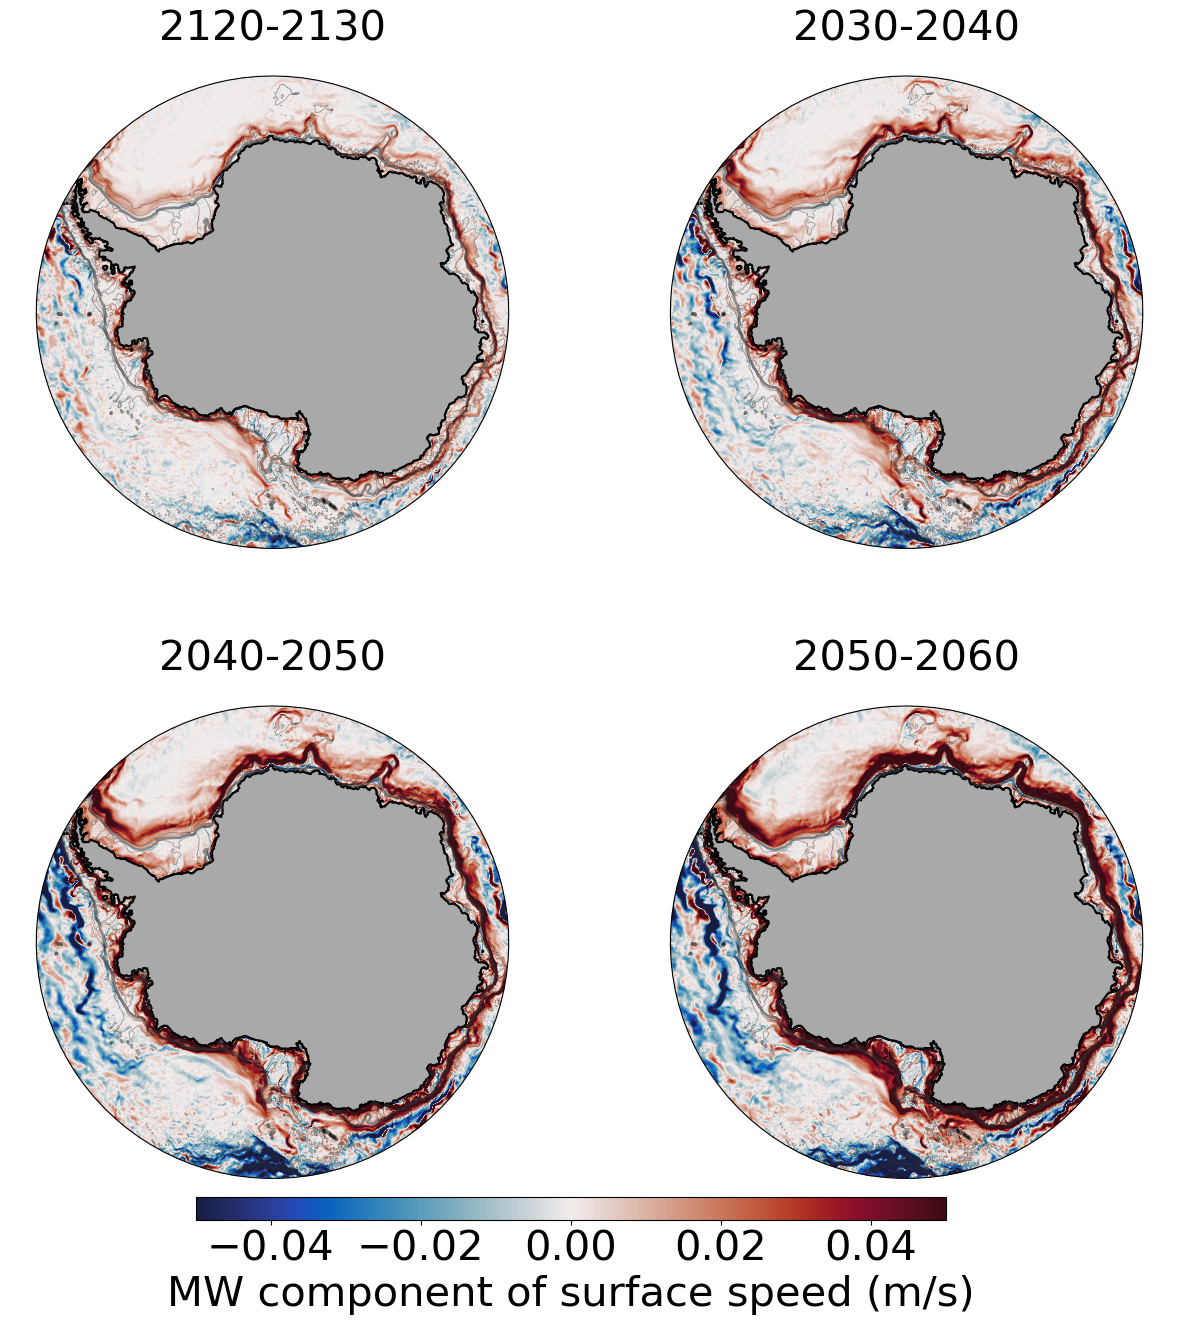

In [109]:
fig = plt.figure(1, figsize=(15, 15))

ax0 = plt.subplot(2, 2, 1, projection=ccrs.SouthPolarStereo(), facecolor="darkgrey")
ax0.set_boundary(circle, transform=ax0.transAxes)
    
# Filled land 
land.plot.contourf(ax=ax0, colors='darkgrey', zorder=2,
                   transform=ccrs.PlateCarree(), add_colorbar=False)

# Coastline
land.fillna(0).plot.contour(ax=ax0, colors='k', levels=[0, 1],
                            transform=ccrs.PlateCarree(), add_colorbar=False)

# Depth contours
ht.plot.contour(ax=ax0, levels=[500, 1000, 2000, 3000],
                colors='0.2', linewidths=[0.5, 2, 0.5, 0.5], alpha=0.5,
                transform=ccrs.PlateCarree())

# surface temp for mw component
sc = speed_mw_comp_t[1].plot(ax = ax0,vmax = 0.05, vmin = - 0.05,  cmap=cmocean.cm.balance,transform=ccrs.PlateCarree(), add_colorbar = False) #cmap=cmocean.cm.balance,

ax0.set_title('2120-2130')

##########
ax1 = plt.subplot(2, 2, 2, projection=ccrs.SouthPolarStereo(), facecolor="darkgrey")
ax1.set_boundary(circle, transform=ax1.transAxes)
    
# Filled land 
land.plot.contourf(ax=ax1, colors='darkgrey', zorder=2,
                   transform=ccrs.PlateCarree(), add_colorbar=False)

# Coastline
land.fillna(0).plot.contour(ax=ax1, colors='k', levels=[0, 1],
                            transform=ccrs.PlateCarree(), add_colorbar=False)

# Depth contours
ht.plot.contour(ax=ax1, levels=[500, 1000, 2000, 3000],
                colors='0.2', linewidths=[0.5, 2, 0.5, 0.5], alpha=0.5,
                transform=ccrs.PlateCarree())

# surface temp for mw component
sc = speed_mw_comp_t[2].plot(ax = ax1,vmax = 0.05, vmin = - 0.05, cmap=cmocean.cm.balance,transform=ccrs.PlateCarree(), add_colorbar = False) #cmap=cmocean.cm.balance,

ax1.set_title('2030-2040')
#######
ax2 = plt.subplot(2, 2, 3, projection=ccrs.SouthPolarStereo(), facecolor="darkgrey")
ax2.set_boundary(circle, transform=ax2.transAxes)
    
# Filled land 
land.plot.contourf(ax=ax2, colors='darkgrey', zorder=2,
                   transform=ccrs.PlateCarree(), add_colorbar=False)

# Coastline
land.fillna(0).plot.contour(ax=ax2, colors='k', levels=[0, 1],
                            transform=ccrs.PlateCarree(), add_colorbar=False)

# Depth contours
ht.plot.contour(ax=ax2, levels=[500, 1000, 2000, 3000], colors='0.2', linewidths=[0.5, 2, 0.5, 0.5], alpha=0.5,\
                transform=ccrs.PlateCarree())

# surface temp for mw component
sc = speed_mw_comp_t[3].plot(ax = ax2,vmax = 0.05, vmin = - 0.05,  cmap=cmocean.cm.balance,transform=ccrs.PlateCarree(), add_colorbar = False)
ax2.set_title('2040-2050')

#######
ax3 = plt.subplot(2, 2, 4, projection=ccrs.SouthPolarStereo(), facecolor="darkgrey")
ax3.set_boundary(circle, transform=ax3.transAxes)
    
# Filled land 
land.plot.contourf(ax=ax3, colors='darkgrey', zorder=2,
                   transform=ccrs.PlateCarree(), add_colorbar=False)

# Coastline
land.fillna(0).plot.contour(ax=ax3, colors='k', levels=[0, 1],
                            transform=ccrs.PlateCarree(), add_colorbar=False)

# Depth contours
ht.plot.contour(ax=ax3, levels=[500, 1000, 2000, 3000], colors='0.2', linewidths=[0.5, 2, 0.5, 0.5], alpha=0.5,\
                transform=ccrs.PlateCarree())

# surface temp for mw component
sc = speed_mw_comp_t[4].plot(ax = ax3,vmax = 0.05, vmin = - 0.05, cmap=cmocean.cm.balance,transform=ccrs.PlateCarree(), add_colorbar = False)
ax3.set_title('2050-2060')

'''cbar_kwargs={'orientation': 'vertical',\
                                    'shrink': 0.25,\
                                    'extend': 'both',\
                                    'label': None, \
                                    'aspect': 8}) #cmap=cmocean.cm.balance,'''

cax = fig.add_axes([0.25,0.1,0.5,0.015])
cb = plt.colorbar(sc,cax = cax,  orientation = 'horizontal', label ='MW component of surface speed (m/s)')
#plt.tight_layout()

In [ ]:
## surface speed - 

In [101]:
u_ryf = cc.querying.getvar(expt='01deg_jra55v13_ryf9091', variable='u', 
                          session=session, frequency='1 monthly', start_time='2110-01-31 00:00:00', 
                          end_time='2159-12-31 00:00:00').sel(yu_ocean = lat_lim).isel(st_ocean = 0)
v_ryf = cc.querying.getvar(expt='01deg_jra55v13_ryf9091', variable='v', 
                          session=session, frequency='1 monthly' ,start_time='2110-01-31 00:00:00', 
                          end_time='2159-12-31 00:00:00').sel(yu_ocean = lat_lim).isel(st_ocean = 0)
v_ryf

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/xarray/core/dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/xarray/core/dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/xarray/core/dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3

<xarray.DataArray 'v' (time: 600, yu_ocean: 440, xu_ocean: 3600)> Size: 4GB
dask.array<getitem, shape=(600, 440, 3600), dtype=float32, chunksize=(1, 250, 400), chunktype=numpy.ndarray>
Coordinates:
    st_ocean  float64 8B 0.5413
  * time      (time) object 5kB 2110-01-16 12:00:00 ... 2159-12-16 12:00:00
  * xu_ocean  (xu_ocean) float64 29kB -279.9 -279.8 -279.7 ... 79.8 79.9 80.0
  * yu_ocean  (yu_ocean) float64 4kB -78.98 -78.93 -78.89 ... -60.07 -60.02
Attributes: (12/13)
    long_name:      j-current
    units:          m/sec
    valid_range:    [-10.  10.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_water_y_velocity
    ...             ...
    contact:        Andy Hogg
    email:          andy.hogg@anu.edu.au
    created:        2020-06-11
    description:    0.1 degree ACCESS-OM2 global model configuration with JRA...
    notes:          Additional daily outputs saved from 1 Jan 1950 to 31 Dec ...
    url:            https://github.com/COSIMA/01deg_jra55_ryf/tree/01deg_jra5...

In [105]:
speed_wt_comp_t = [] # wind thermal component
for n in range(5):
    speed_wthp = np.sqrt(u_wthp.isel(time = slice(120*n, 120*(n+1)))**2 + v_wthp.isel(time = slice(120*n, 120*(n+1)))**2)
    speed_ryf = np.sqrt(u_ryf.isel(time = slice(120*n, 120*(n+1)))**2 + v_ryf.isel(time = slice(120*n, 120*(n+1)))**2)
    speed_wt_comp = (speed_wthp- speed_ryf).mean(dim = 'time').load()
    speed_wt_comp_t.append(speed_wt_comp)
speed_wt_comp

<xarray.DataArray (yu_ocean: 440, xu_ocean: 3600)> Size: 6MB
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [-0.0100378 , -0.00518031, -0.00033588, ..., -0.01425217,
        -0.01454484, -0.01329133],
       [-0.01179217, -0.00550935, -0.00037248, ..., -0.01715321,
        -0.0181552 , -0.01636502],
       [-0.01372541, -0.00666566, -0.00167705, ..., -0.02049079,
        -0.02176422, -0.01958555]], dtype=float32)
Coordinates:
    st_ocean  float64 8B 0.5413
  * xu_ocean  (xu_ocean) float64 29kB -279.9 -279.8 -279.7 ... 79.8 79.9 80.0
  * yu_ocean  (yu_ocean) float64 4kB -78.98 -78.93 -78.89 ... -60.07 -60.02

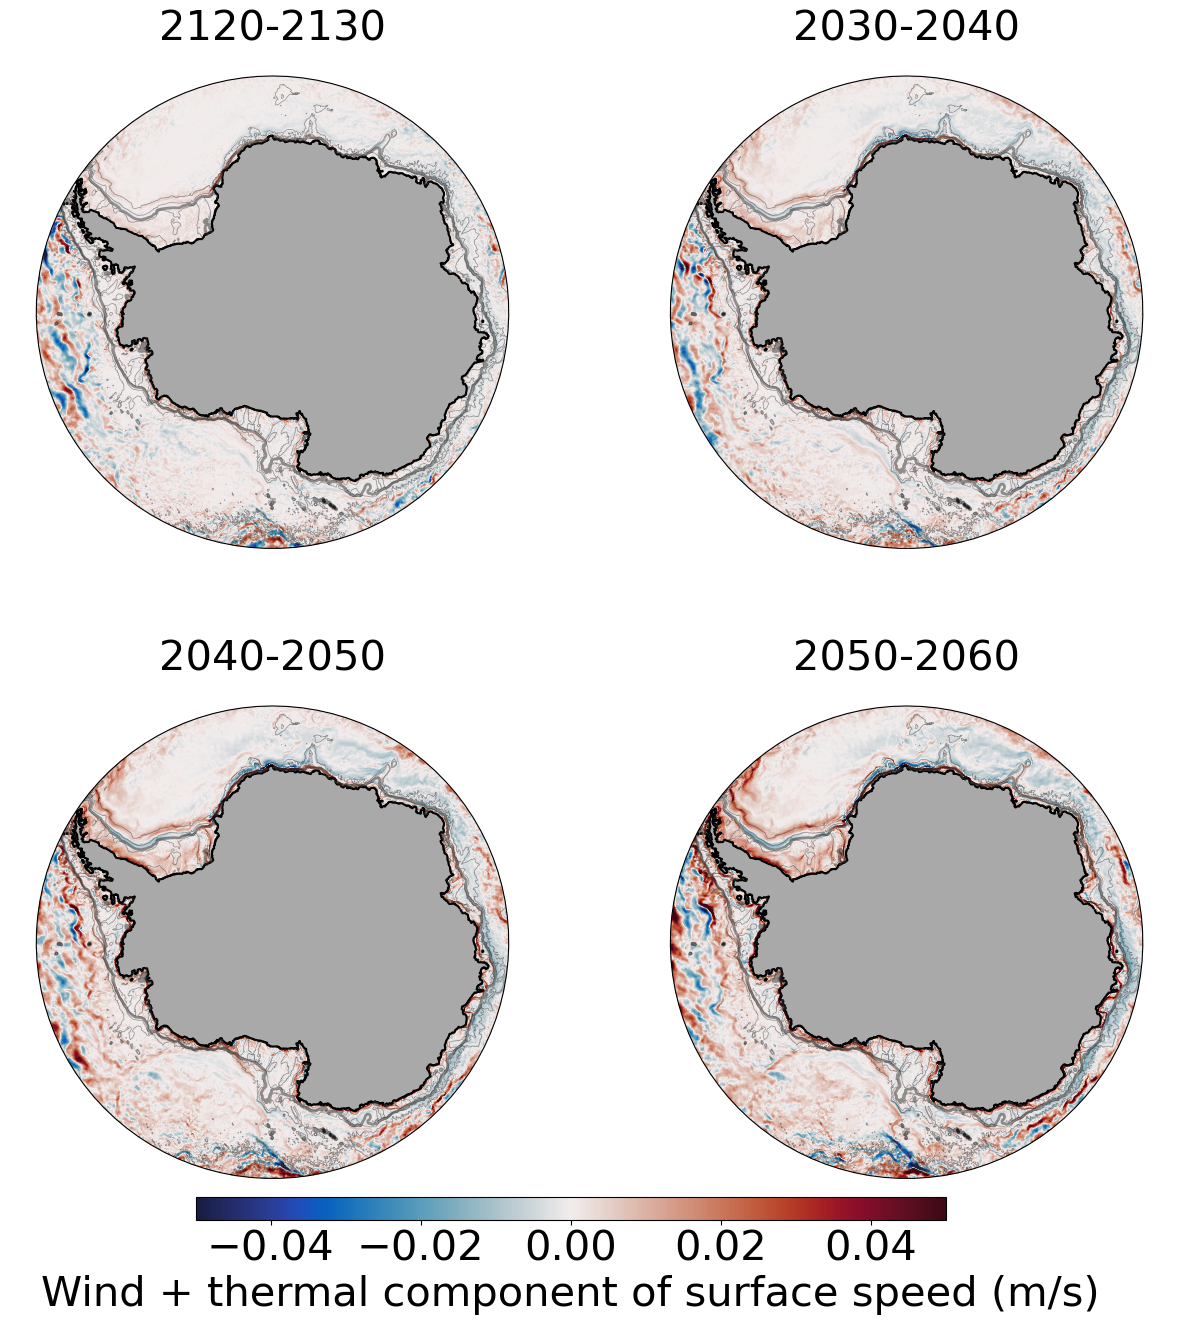

In [106]:
fig = plt.figure(1, figsize=(15, 15))

ax0 = plt.subplot(2, 2, 1, projection=ccrs.SouthPolarStereo(), facecolor="darkgrey")
ax0.set_boundary(circle, transform=ax0.transAxes)
    
# Filled land 
land.plot.contourf(ax=ax0, colors='darkgrey', zorder=2,
                   transform=ccrs.PlateCarree(), add_colorbar=False)

# Coastline
land.fillna(0).plot.contour(ax=ax0, colors='k', levels=[0, 1],
                            transform=ccrs.PlateCarree(), add_colorbar=False)

# Depth contours
ht.plot.contour(ax=ax0, levels=[500, 1000, 2000, 3000],
                colors='0.2', linewidths=[0.5, 2, 0.5, 0.5], alpha=0.5,
                transform=ccrs.PlateCarree())

# surface temp for wt component
sc = speed_wt_comp_t[1].plot(ax = ax0,vmax = 0.05, vmin = - 0.05,  cmap=cmocean.cm.balance,transform=ccrs.PlateCarree(), add_colorbar = False) #cmap=cmocean.cm.balance,

ax0.set_title('2120-2130')

##########
ax1 = plt.subplot(2, 2, 2, projection=ccrs.SouthPolarStereo(), facecolor="darkgrey")
ax1.set_boundary(circle, transform=ax1.transAxes)
    
# Filled land 
land.plot.contourf(ax=ax1, colors='darkgrey', zorder=2,
                   transform=ccrs.PlateCarree(), add_colorbar=False)

# Coastline
land.fillna(0).plot.contour(ax=ax1, colors='k', levels=[0, 1],
                            transform=ccrs.PlateCarree(), add_colorbar=False)

# Depth contours
ht.plot.contour(ax=ax1, levels=[500, 1000, 2000, 3000],
                colors='0.2', linewidths=[0.5, 2, 0.5, 0.5], alpha=0.5,
                transform=ccrs.PlateCarree())

# surface temp for mw component
sc = speed_wt_comp_t[2].plot(ax = ax1,vmax = 0.05, vmin = - 0.05, cmap=cmocean.cm.balance,transform=ccrs.PlateCarree(), add_colorbar = False) #cmap=cmocean.cm.balance,

ax1.set_title('2030-2040')
#######
ax2 = plt.subplot(2, 2, 3, projection=ccrs.SouthPolarStereo(), facecolor="darkgrey")
ax2.set_boundary(circle, transform=ax2.transAxes)
    
# Filled land 
land.plot.contourf(ax=ax2, colors='darkgrey', zorder=2,
                   transform=ccrs.PlateCarree(), add_colorbar=False)

# Coastline
land.fillna(0).plot.contour(ax=ax2, colors='k', levels=[0, 1],
                            transform=ccrs.PlateCarree(), add_colorbar=False)

# Depth contours
ht.plot.contour(ax=ax2, levels=[500, 1000, 2000, 3000], colors='0.2', linewidths=[0.5, 2, 0.5, 0.5], alpha=0.5,\
                transform=ccrs.PlateCarree())

# surface temp for mw component
sc = speed_wt_comp_t[3].plot(ax = ax2,vmax = 0.05, vmin = - 0.05,  cmap=cmocean.cm.balance,transform=ccrs.PlateCarree(), add_colorbar = False)
ax2.set_title('2040-2050')

#######
ax3 = plt.subplot(2, 2, 4, projection=ccrs.SouthPolarStereo(), facecolor="darkgrey")
ax3.set_boundary(circle, transform=ax3.transAxes)
    
# Filled land 
land.plot.contourf(ax=ax3, colors='darkgrey', zorder=2,
                   transform=ccrs.PlateCarree(), add_colorbar=False)

# Coastline
land.fillna(0).plot.contour(ax=ax3, colors='k', levels=[0, 1],
                            transform=ccrs.PlateCarree(), add_colorbar=False)

# Depth contours
ht.plot.contour(ax=ax3, levels=[500, 1000, 2000, 3000], colors='0.2', linewidths=[0.5, 2, 0.5, 0.5], alpha=0.5,\
                transform=ccrs.PlateCarree())

# surface temp for mw component
sc = speed_wt_comp_t[4].plot(ax = ax3,vmax = 0.05, vmin = - 0.05, cmap=cmocean.cm.balance,transform=ccrs.PlateCarree(), add_colorbar = False)
ax3.set_title('2050-2060')

'''cbar_kwargs={'orientation': 'vertical',\
                                    'shrink': 0.25,\
                                    'extend': 'both',\
                                    'label': None, \
                                    'aspect': 8}) #cmap=cmocean.cm.balance,'''

cax = fig.add_axes([0.25,0.1,0.5,0.015])
cb = plt.colorbar(sc,cax = cax,  orientation = 'horizontal', label ='Wind + thermal component of surface speed (m/s)')
#plt.tight_layout()

In [110]:
speed_wtm_comp_t = [] # wind thermal mw component
for n in range(5):
    speed_wthmp = np.sqrt(u_wthmp.isel(time = slice(120*n, 120*(n+1)))**2 + v_wthmp.isel(time = slice(120*n, 120*(n+1)))**2)
    speed_ryf = np.sqrt(u_ryf.isel(time = slice(120*n, 120*(n+1)))**2 + v_ryf.isel(time = slice(120*n, 120*(n+1)))**2)
    speed_wtm_comp = (speed_wthmp- speed_ryf).mean(dim = 'time').load()
    speed_wtm_comp_t.append(speed_wtm_comp)
speed_wtm_comp

<xarray.DataArray (yu_ocean: 440, xu_ocean: 3600)> Size: 6MB
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [0.02577875, 0.02733853, 0.02821313, ..., 0.01733705, 0.021632  ,
        0.02419632],
       [0.02335009, 0.02463086, 0.026142  , ..., 0.02006182, 0.02171137,
        0.02214689],
       [0.02101205, 0.02268994, 0.0240374 , ..., 0.02155778, 0.02061764,
        0.01961657]], dtype=float32)
Coordinates:
    st_ocean  float64 8B 0.5413
  * xu_ocean  (xu_ocean) float64 29kB -279.9 -279.8 -279.7 ... 79.8 79.9 80.0
  * yu_ocean  (yu_ocean) float64 4kB -78.98 -78.93 -78.89 ... -60.07 -60.02

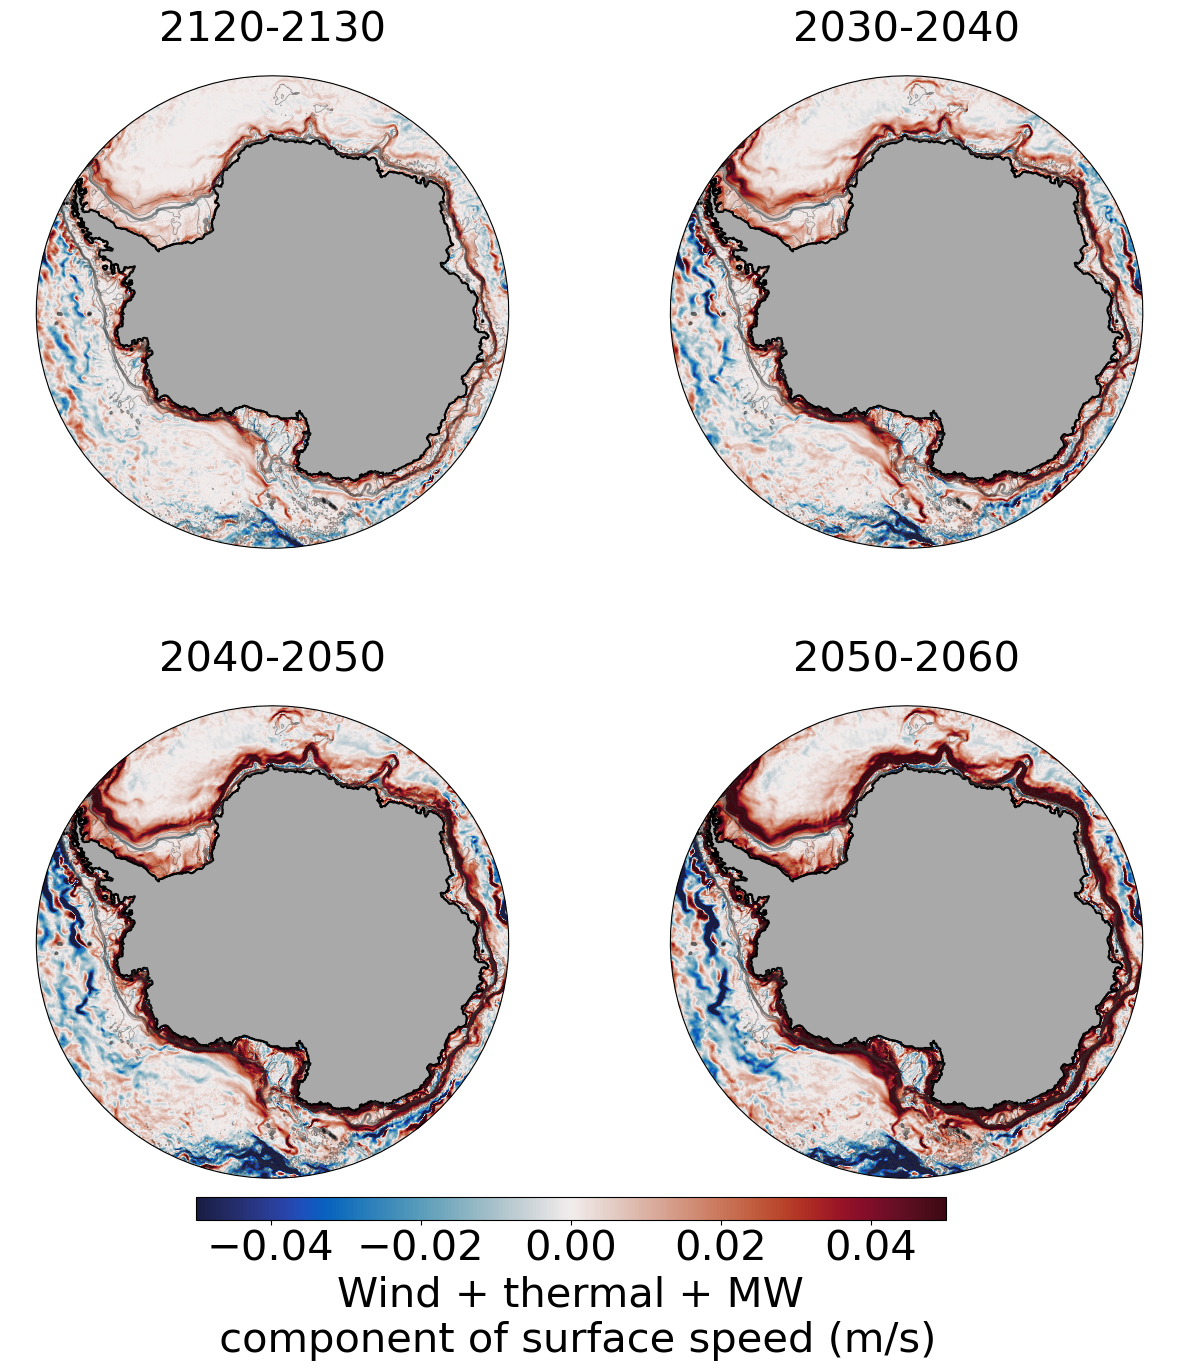

In [112]:
fig = plt.figure(1, figsize=(15, 15))

ax0 = plt.subplot(2, 2, 1, projection=ccrs.SouthPolarStereo(), facecolor="darkgrey")
ax0.set_boundary(circle, transform=ax0.transAxes)
    
# Filled land 
land.plot.contourf(ax=ax0, colors='darkgrey', zorder=2,
                   transform=ccrs.PlateCarree(), add_colorbar=False)

# Coastline
land.fillna(0).plot.contour(ax=ax0, colors='k', levels=[0, 1],
                            transform=ccrs.PlateCarree(), add_colorbar=False)

# Depth contours
ht.plot.contour(ax=ax0, levels=[500, 1000, 2000, 3000],
                colors='0.2', linewidths=[0.5, 2, 0.5, 0.5], alpha=0.5,
                transform=ccrs.PlateCarree())

# surface temp for wt component
sc = speed_wtm_comp_t[1].plot(ax = ax0,vmax = 0.05, vmin = - 0.05,  cmap=cmocean.cm.balance,transform=ccrs.PlateCarree(), add_colorbar = False) #cmap=cmocean.cm.balance,

ax0.set_title('2120-2130')

##########
ax1 = plt.subplot(2, 2, 2, projection=ccrs.SouthPolarStereo(), facecolor="darkgrey")
ax1.set_boundary(circle, transform=ax1.transAxes)
    
# Filled land 
land.plot.contourf(ax=ax1, colors='darkgrey', zorder=2,
                   transform=ccrs.PlateCarree(), add_colorbar=False)

# Coastline
land.fillna(0).plot.contour(ax=ax1, colors='k', levels=[0, 1],
                            transform=ccrs.PlateCarree(), add_colorbar=False)

# Depth contours
ht.plot.contour(ax=ax1, levels=[500, 1000, 2000, 3000],
                colors='0.2', linewidths=[0.5, 2, 0.5, 0.5], alpha=0.5,
                transform=ccrs.PlateCarree())

# surface temp for mw component
sc = speed_wtm_comp_t[2].plot(ax = ax1,vmax = 0.05, vmin = - 0.05, cmap=cmocean.cm.balance,transform=ccrs.PlateCarree(), add_colorbar = False) #cmap=cmocean.cm.balance,

ax1.set_title('2030-2040')
#######
ax2 = plt.subplot(2, 2, 3, projection=ccrs.SouthPolarStereo(), facecolor="darkgrey")
ax2.set_boundary(circle, transform=ax2.transAxes)
    
# Filled land 
land.plot.contourf(ax=ax2, colors='darkgrey', zorder=2,
                   transform=ccrs.PlateCarree(), add_colorbar=False)

# Coastline
land.fillna(0).plot.contour(ax=ax2, colors='k', levels=[0, 1],
                            transform=ccrs.PlateCarree(), add_colorbar=False)

# Depth contours
ht.plot.contour(ax=ax2, levels=[500, 1000, 2000, 3000], colors='0.2', linewidths=[0.5, 2, 0.5, 0.5], alpha=0.5,\
                transform=ccrs.PlateCarree())

# surface temp for mw component
sc = speed_wtm_comp_t[3].plot(ax = ax2,vmax = 0.05, vmin = - 0.05,  cmap=cmocean.cm.balance,transform=ccrs.PlateCarree(), add_colorbar = False)
ax2.set_title('2040-2050')

#######
ax3 = plt.subplot(2, 2, 4, projection=ccrs.SouthPolarStereo(), facecolor="darkgrey")
ax3.set_boundary(circle, transform=ax3.transAxes)
    
# Filled land 
land.plot.contourf(ax=ax3, colors='darkgrey', zorder=2,
                   transform=ccrs.PlateCarree(), add_colorbar=False)

# Coastline
land.fillna(0).plot.contour(ax=ax3, colors='k', levels=[0, 1],
                            transform=ccrs.PlateCarree(), add_colorbar=False)

# Depth contours
ht.plot.contour(ax=ax3, levels=[500, 1000, 2000, 3000], colors='0.2', linewidths=[0.5, 2, 0.5, 0.5], alpha=0.5,\
                transform=ccrs.PlateCarree())

# surface temp for mw component
sc = speed_wtm_comp_t[4].plot(ax = ax3,vmax = 0.05, vmin = - 0.05, cmap=cmocean.cm.balance,transform=ccrs.PlateCarree(), add_colorbar = False)
ax3.set_title('2050-2060')

'''cbar_kwargs={'orientation': 'vertical',\
                                    'shrink': 0.25,\
                                    'extend': 'both',\
                                    'label': None, \
                                    'aspect': 8}) #cmap=cmocean.cm.balance,'''

cax = fig.add_axes([0.25,0.1,0.5,0.015])
cb = plt.colorbar(sc,cax = cax,  orientation = 'horizontal', label ='Wind + thermal + MW\n component of surface speed (m/s)')
#plt.tight_layout()